In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Preparing and cleaning the data:

In [2]:
genes_train = pd.read_csv("data_set_ALL_AML_train.csv")
labels = pd.read_csv("actual.csv")

In [3]:
expression = [col for col in genes_train.columns if "call" not in col]

In [4]:
genes_train = genes_train[expression]

In [5]:
genes_train = genes_train.drop(["Gene Description", "Gene Accession Number"], axis=1)

In [6]:
genes_train = genes_train.T

In [7]:
genes_train.shape

(38, 7129)

In [8]:
genes_train.head(20)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


In [9]:
genes_train.tail(20)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
19,-44,-51,100,207,-146,-221,83,-198,34,-20,...,318,397,-48,1939,-18,538,90,-50,333,-24
20,17,-229,79,218,-262,-404,326,-201,6,469,...,225,1020,-110,209,-51,1435,255,53,545,-16
21,-144,-199,-157,132,-151,-347,-118,-24,126,-201,...,103,595,-12,36,26,208,113,-8,22,-22
22,-247,-90,-168,-24,-308,-571,-170,-224,124,-117,...,158,402,57,253,-52,1010,405,19,270,-27
23,-74,-321,-11,-36,-317,-499,-138,-119,115,-17,...,129,1058,140,176,-22,617,336,9,243,36
24,-120,-263,-114,255,-342,-396,-412,-153,184,-162,...,176,725,13,249,1,646,391,81,203,-94
25,-81,-150,-85,316,-418,-461,-66,-184,164,-5,...,138,392,8,506,24,1034,69,24,807,-41
26,-112,-233,-78,54,-244,-275,-479,-108,136,-86,...,190,678,77,2527,-36,838,313,21,145,-19
27,-273,-327,-76,81,-439,-616,419,-251,165,350,...,120,816,45,62,-71,583,677,-1,208,10
34,-20,-207,-50,101,-369,-529,14,-365,153,29,...,260,1009,-55,139,-57,834,557,-12,335,-65


So, we can see that patients' names are not in the right order. Let's sort them:

In [10]:
genes_train.index = pd.to_numeric(genes_train.index)
genes_train.sort_index(inplace=True)

In [11]:
genes_train.tail(25)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
14,-113,-147,-118,243,-127,-398,-249,-228,-37,113,...,267,440,52,229,-4,431,269,8,163,-22
15,-107,-72,-126,149,-205,-284,-166,-185,1,-23,...,120,722,20,332,-5,195,59,31,116,-18
16,-117,-219,-50,257,-218,-402,228,-147,65,67,...,79,631,-26,455,-62,736,445,42,246,-43
17,-476,-213,-18,301,-403,-394,-42,-144,98,173,...,241,1215,127,255,50,1701,1109,61,526,-83
18,-81,-150,-119,78,-152,-340,-36,-141,96,-55,...,186,573,-57,694,-19,636,205,17,127,-13
19,-44,-51,100,207,-146,-221,83,-198,34,-20,...,318,397,-48,1939,-18,538,90,-50,333,-24
20,17,-229,79,218,-262,-404,326,-201,6,469,...,225,1020,-110,209,-51,1435,255,53,545,-16
21,-144,-199,-157,132,-151,-347,-118,-24,126,-201,...,103,595,-12,36,26,208,113,-8,22,-22
22,-247,-90,-168,-24,-308,-571,-170,-224,124,-117,...,158,402,57,253,-52,1010,405,19,270,-27
23,-74,-321,-11,-36,-317,-499,-138,-119,115,-17,...,129,1058,140,176,-22,617,336,9,243,36


importing PCA and creating a model:

In [12]:
from sklearn.decomposition import PCA

Of course we know the data context. But still, let's set "n_components" hyperparameter at 30

In [13]:
pca = PCA(n_components=30)

We aren't going to normalize our data. As far as I know, the data obtained from microarrays are already normalized and scaled. Researches use endogeneous control genes to "smooth" the expression. We can see genes denoted as "endogeneous control" in the data sets. 

In [14]:
X = pca.fit_transform(genes_train)

In [15]:
cum_sum = (pca.explained_variance_ratio_.cumsum()) * 100

Text(0,0.5,'load')

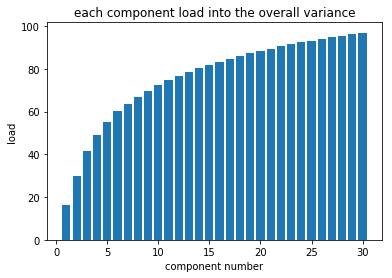

In [16]:
plt.bar(range(1,len(cum_sum) + 1), cum_sum)
plt.title("each component load into the overall variance")
plt.xlabel("component number")
plt.ylabel("load")

In [17]:
X_df = pd.DataFrame(X, index=labels[:38]["cancer"])

In [18]:
X_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cancer,,,,,,,,,,,,,,,,,,,,,
ALL,-4120.321492,8435.742895,-13944.166777,-25981.651362,-10771.034405,1460.792850,9498.853332,-5435.693758,2877.465449,-9758.533294,...,-5496.417239,-2695.334440,21269.525069,5975.480710,1684.139185,-4775.927158,3265.894460,-565.949980,-22.068213,-43.631313
ALL,18628.359789,14407.823800,16617.745275,-2038.229406,10628.290282,13437.809582,-1633.589711,-26398.952376,-11867.073996,2607.447955,...,6517.973429,3586.511632,-6952.683077,-1158.806307,10328.438935,11893.591724,11106.100613,1967.806069,4189.319069,877.267587
ALL,-15823.873167,14048.426842,47332.062728,-16064.219011,22913.562415,2754.981900,8519.093320,-9422.342527,11121.992147,-1121.856054,...,8983.763109,-13028.071619,-3500.625760,-10306.044886,2482.427869,-1167.972335,7991.382272,1036.699019,-9707.953531,551.361450
ALL,-11292.905025,4527.380259,-9426.726478,-15440.938260,1014.753543,1197.696040,-9516.229146,8010.573874,3470.818421,-18020.599326,...,4043.110804,-2022.545908,3063.869625,-10934.142242,-1314.833666,-1001.132510,-7223.209311,-2339.960155,-5721.396641,-2820.844540
ALL,6317.945887,20260.768492,-4576.834579,8993.495133,-17438.376473,-13422.225115,-10983.445819,2387.957548,4971.678932,-10707.422239,...,6870.167132,2358.274851,-2872.144254,-2335.424814,-2613.053834,637.194424,-4515.559922,1820.686760,9313.796354,568.417823
ALL,-39407.235263,-10675.361987,61345.849699,-3778.861250,-19059.585360,-2867.938781,16262.339259,10912.331970,-11694.464083,11774.549940,...,-10.201966,-6472.959490,5926.539094,-3752.436777,-5392.326495,-955.985949,2721.661274,2000.475401,2189.826085,9121.547570
ALL,-39496.785066,-21209.474583,-7327.962393,-35558.814266,15629.056660,4336.452011,4484.856308,11114.548520,16347.750223,-10829.910094,...,-10536.452117,-2433.939988,-10052.403030,5755.934675,-2466.842399,-8168.993036,12638.813099,1585.724684,6348.625712,-717.916700
ALL,-13115.663039,-7447.413097,-17754.500604,-27603.454873,-5358.949703,26083.521382,18170.651588,7905.189082,-15190.740129,-9648.886293,...,11441.834749,-3163.596917,-7154.236373,10384.836792,-7341.818567,335.657245,-6187.884497,2357.751863,7535.022541,3955.128716
ALL,13892.504778,40798.384510,54399.723303,7806.375429,4959.594341,1706.639513,172.511379,-8582.508052,14294.034041,-17244.628950,...,-4542.912104,1379.443049,-6984.812414,13148.565166,6593.214247,10278.389006,-8927.106524,-2770.341104,3176.710400,2571.769929


In [19]:
X_df.tail(15)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cancer,,,,,,,,,,,,,,,,,,,,,
ALL,-3965.539723,22115.391328,-8748.662701,-1884.172813,-3197.236721,-6114.340162,-6307.402487,11310.881377,-7095.016067,-14920.397863,...,7728.751599,-1195.786052,-384.626127,2625.210315,-625.444543,2254.148400,610.698065,9322.395732,732.486327,896.315933
ALL,5566.571476,-7995.645500,-21123.639845,12237.314975,-14099.111286,23348.846720,4422.457862,-27678.946680,-2706.925615,5308.295449,...,6746.386177,-6163.986328,-910.381735,2393.174268,462.929651,-7401.010458,-10132.788216,-1823.467483,-7772.723253,-5749.515019
ALL,-5820.359857,10944.734808,-29820.044023,-9726.018063,-8125.343027,-9798.700045,-723.513901,-22910.939221,2366.214348,8678.280289,...,-13014.644178,-2028.361403,4817.212396,1641.312455,-161.962893,5913.706696,-77.714316,1678.692724,11335.562300,9257.055572
ALL,-38027.322031,-11847.653084,-13725.614359,-1211.131104,2067.374368,1269.892946,2865.341936,11236.704221,-12445.339555,-7745.719064,...,-10500.936849,9066.341808,-5230.888105,1485.812369,-4674.185116,12555.133426,9271.448253,-6480.649666,-7995.279353,-6167.620124
AML,25871.580163,-8081.613305,-7816.033951,6247.301902,5314.342955,13856.507908,-3536.762628,-9317.166721,-2514.330446,-3119.152194,...,4270.426414,-4787.622449,-4277.416259,-4025.332679,-11583.835225,2436.622698,4895.049556,-9624.200604,-7557.712775,14892.118507
AML,-3663.219971,-20399.711482,-11768.866367,33809.787026,-4073.231135,-529.892001,-25788.896258,4174.994017,13091.785215,8058.381047,...,-593.285972,-7578.361095,-5502.722064,646.997173,4973.552994,-3821.380380,13863.154350,-1395.567123,-1199.071164,-2299.044456
AML,53600.910130,-19682.072657,4292.285714,1315.014334,8230.773764,-27694.361673,-9338.176459,-1155.750671,16489.300090,-8415.524442,...,-11174.031937,-10910.350117,7803.738507,-3260.977515,105.939106,3146.898176,-2360.250277,4012.293434,-40.301792,3824.604610
AML,2113.324298,-22623.052041,9575.395958,-6501.800814,-2788.238479,-13342.363283,-16625.060922,7005.642169,5215.306594,-6398.297999,...,4920.490416,14092.736258,1355.834437,4018.780354,-2202.252027,-2517.694797,-1352.054646,-8075.984014,-2326.359741,5901.652454
AML,19273.862904,-13358.012210,2135.264354,-13963.926624,9410.343446,4536.093652,-5474.588655,-1938.346173,-14784.132800,-12225.312162,...,-10851.086115,-5108.135275,-9357.487611,-4795.427532,2708.960597,1236.597077,-5674.480622,7020.008709,741.253245,-12985.603025


In [20]:
X_df["patients"] = range(1, len(X_df) + 1)

In [21]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,patients
cancer,,,,,,,,,,,,,,,,,,,,,
ALL,-4120.321492,8435.742895,-13944.166777,-25981.651362,-10771.034405,1460.792850,9498.853332,-5435.693758,2877.465449,-9758.533294,...,-2695.334440,21269.525069,5975.480710,1684.139185,-4775.927158,3265.894460,-565.949980,-22.068213,-43.631313,1
ALL,18628.359789,14407.823800,16617.745275,-2038.229406,10628.290282,13437.809582,-1633.589711,-26398.952376,-11867.073996,2607.447955,...,3586.511632,-6952.683077,-1158.806307,10328.438935,11893.591724,11106.100613,1967.806069,4189.319069,877.267587,2
ALL,-15823.873167,14048.426842,47332.062728,-16064.219011,22913.562415,2754.981900,8519.093320,-9422.342527,11121.992147,-1121.856054,...,-13028.071619,-3500.625760,-10306.044886,2482.427869,-1167.972335,7991.382272,1036.699019,-9707.953531,551.361450,3
ALL,-11292.905025,4527.380259,-9426.726478,-15440.938260,1014.753543,1197.696040,-9516.229146,8010.573874,3470.818421,-18020.599326,...,-2022.545908,3063.869625,-10934.142242,-1314.833666,-1001.132510,-7223.209311,-2339.960155,-5721.396641,-2820.844540,4
ALL,6317.945887,20260.768492,-4576.834579,8993.495133,-17438.376473,-13422.225115,-10983.445819,2387.957548,4971.678932,-10707.422239,...,2358.274851,-2872.144254,-2335.424814,-2613.053834,637.194424,-4515.559922,1820.686760,9313.796354,568.417823,5


Text(0.5,1,'PCA')

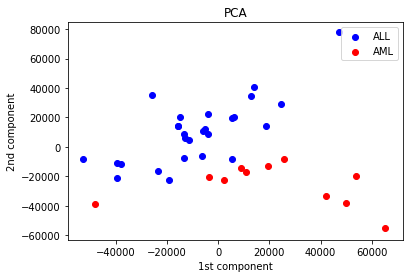

In [22]:
# awkward style of dots labelling, but still it works

plt.scatter(X_df.loc["ALL",0], X_df.loc["ALL",1], c="blue", label="ALL")
plt.scatter(X_df.loc["AML",0], X_df.loc["AML",1], c="red", label="AML")
    
plt.legend()

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("PCA")

Text(0.5,1,'PCA')

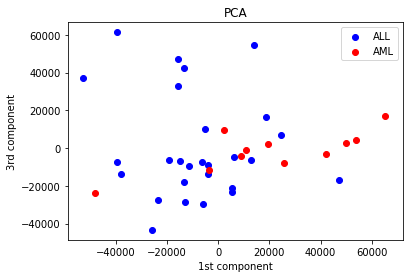

In [23]:

plt.scatter(X_df.loc["ALL",0], X_df.loc["ALL",2], c="blue", label="ALL")
plt.scatter(X_df.loc["AML",0], X_df.loc["AML",2], c="red", label="AML")
    
plt.legend()

plt.xlabel("1st component")
plt.ylabel("3rd component")
plt.title("PCA")

Text(0.5,1,'PCA')

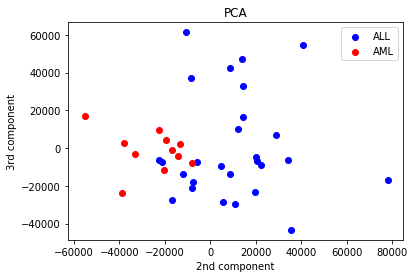

In [24]:

plt.scatter(X_df.loc["ALL",1], X_df.loc["ALL",2], c="blue", label="ALL")
plt.scatter(X_df.loc["AML",1], X_df.loc["AML",2], c="red", label="AML")
    
plt.legend()

plt.xlabel("2nd component")
plt.ylabel("3rd component")
plt.title("PCA")

<IPython.core.display.Javascript object>


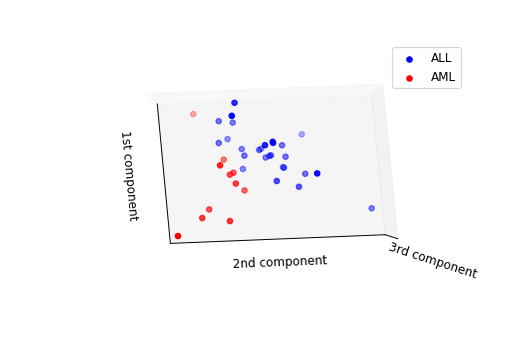

In [26]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig_3D = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(X_df.loc["ALL",0], X_df.loc["ALL",1], X_df.loc["ALL",2], c="blue", label="ALL")
ax.scatter(X_df.loc["AML",0], X_df.loc["AML",1], X_df.loc["AML",2], c="red", label="AML")

ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")
ax.set_zlabel("3rd component")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


ax.legend()

Thus, ALL and AML patients tend to cluster together. Although some overlapping still exists.

Let's try another variant. Now we normalize the data and see whether it has an impact on our PCA model.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
genes_norm = StandardScaler().fit_transform(genes_train)

In [29]:
genes_norm.shape

(38, 7129)

In [30]:
pca_norm = PCA(n_components=30)

In [31]:
X_norm = pca_norm.fit_transform(genes_norm)

In [32]:
cum_sum_norm = (pca_norm.explained_variance_ratio_.cumsum()) * 100

Text(0,0.5,'load')

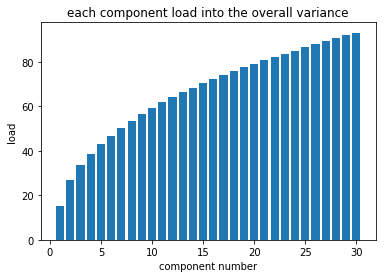

In [33]:
%matplotlib inline
plt.bar(range(1, len(cum_sum_norm) + 1), cum_sum_norm)
plt.title("each component load into the overall variance")
plt.xlabel("component number")
plt.ylabel("load")

In [34]:
X_df_norm = pd.DataFrame(X_norm, index=labels[:38]["cancer"])

In [35]:
X_df_norm["patients"] = range(1, len(X_df) + 1)

Text(0.5,1,'PCA')

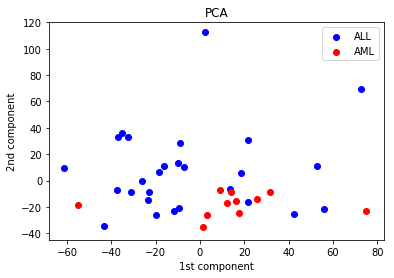

In [36]:
# totally awkward style of plotting, but still it works
plt.scatter(X_df_norm.loc["ALL",0], X_df_norm.loc["ALL",1], c="blue", label="ALL")
plt.scatter(X_df_norm.loc["AML",0], X_df_norm.loc["AML",1], c="red", label="AML")
    
plt.legend()

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("PCA")

Text(0.5,1,'PCA')

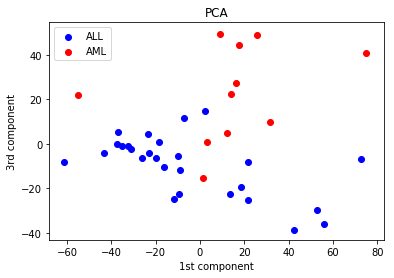

In [37]:
plt.scatter(X_df_norm.loc["ALL",0], X_df_norm.loc["ALL",2], c="blue", label="ALL")
plt.scatter(X_df_norm.loc["AML",0], X_df_norm.loc["AML",2], c="red", label="AML")
    
plt.legend()

plt.xlabel("1st component")
plt.ylabel("3rd component")
plt.title("PCA")

Text(0.5,1,'PCA')

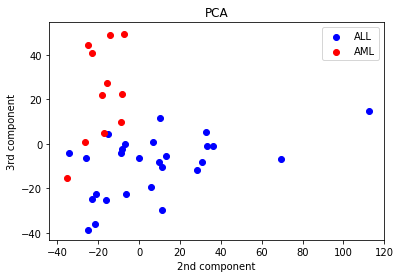

In [38]:
plt.scatter(X_df_norm.loc["ALL",1], X_df_norm.loc["ALL",2], c="blue", label="ALL")
plt.scatter(X_df_norm.loc["AML",1], X_df_norm.loc["AML",2], c="red", label="AML")
    
plt.legend()

plt.xlabel("2nd component")
plt.ylabel("3rd component")
plt.title("PCA")

<IPython.core.display.Javascript object>


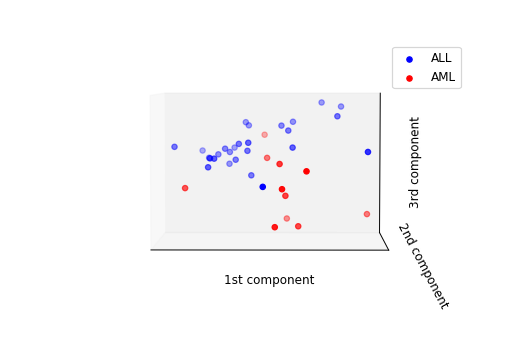

In [39]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig_3D = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(X_df_norm.loc["ALL",0], X_df_norm.loc["ALL",1], X_df_norm.loc["ALL",2], c="blue", label="ALL")
ax.scatter(X_df_norm.loc["AML",0], X_df_norm.loc["AML",1], X_df_norm.loc["AML",2], c="red", label="AML")

ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")
ax.set_zlabel("3rd component")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])



ax.legend()

PCA generates nearly the same result with normalizing. 

Now we are going to merge the training and test data sets. Then we create another PCA model with n_components equal to 3. We'll label the samples from the test data set, and see if PCA group them properly.

In [40]:
genes_test = pd.read_csv("data_set_ALL_AML_independent.csv")

In [41]:
expression_test = [col for col in genes_test.columns if "call" not in col]

In [42]:
genes_test = genes_test[expression_test]

In [43]:
genes_test = genes_test.drop(["Gene Description", "Gene Accession Number"], axis=1)

In [44]:
genes_test = genes_test.T

In [45]:
genes_test.index = pd.to_numeric(genes_test.index)
genes_test.sort_index(inplace=True)

In [46]:
genes_test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81
44,-146,-74,170,174,-32,-318,8,-152,-148,17,...,180,690,-142,249,-220,354,-42,-100,45,-108
45,-187,-187,312,142,114,-148,-184,-133,12,97,...,37,125,-185,13,-148,304,-1,-207,112,-190
46,-56,-43,43,177,-116,-184,-105,-62,0,-40,...,103,593,0,-24,18,625,173,63,63,-62
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [47]:
genes_test.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
63,-161,-215,-46,146,-172,-596,-122,-341,171,-147,...,130,639,-27,548,-39,809,445,-2,210,16
64,-48,-531,-124,431,-496,-696,-1038,-441,235,157,...,84,1141,-121,197,-108,466,349,0,284,-73
65,-62,-198,-5,141,-256,-206,-298,-218,-14,100,...,92,532,-34,239,-78,707,354,-22,260,5
66,-58,-217,63,95,-191,-230,-86,-152,-6,-249,...,63,297,36,358,2,423,41,0,1777,-49
67,-76,-98,-153,237,-215,-122,-68,-118,6,208,...,179,497,31,241,-20,441,99,-8,80,-12
68,-154,-136,49,180,-257,-273,141,-123,52,878,...,214,540,13,1075,-45,524,249,40,-68,-1
69,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,409,617,-34,738,11,742,234,72,109,-30
70,-55,-44,12,129,-108,-301,-222,-133,136,320,...,131,318,35,241,-66,320,174,-4,176,40
71,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,214,760,-38,201,-55,348,208,0,74,-12
72,-131,-126,-50,211,-206,-287,-34,-114,62,341,...,206,697,3,1046,27,874,393,34,237,-2


In [48]:
pca_test = PCA(n_components=3)

In [49]:
genes_train_test = genes_train.append(genes_test)

In [50]:
genes_train_test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


In [51]:
genes_train_test.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
63,-161,-215,-46,146,-172,-596,-122,-341,171,-147,...,130,639,-27,548,-39,809,445,-2,210,16
64,-48,-531,-124,431,-496,-696,-1038,-441,235,157,...,84,1141,-121,197,-108,466,349,0,284,-73
65,-62,-198,-5,141,-256,-206,-298,-218,-14,100,...,92,532,-34,239,-78,707,354,-22,260,5
66,-58,-217,63,95,-191,-230,-86,-152,-6,-249,...,63,297,36,358,2,423,41,0,1777,-49
67,-76,-98,-153,237,-215,-122,-68,-118,6,208,...,179,497,31,241,-20,441,99,-8,80,-12
68,-154,-136,49,180,-257,-273,141,-123,52,878,...,214,540,13,1075,-45,524,249,40,-68,-1
69,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,409,617,-34,738,11,742,234,72,109,-30
70,-55,-44,12,129,-108,-301,-222,-133,136,320,...,131,318,35,241,-66,320,174,-4,176,40
71,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,214,760,-38,201,-55,348,208,0,74,-12
72,-131,-126,-50,211,-206,-287,-34,-114,62,341,...,206,697,3,1046,27,874,393,34,237,-2


In [52]:
pca_test = PCA(n_components=3)

In [53]:
X_test = pca_test.fit_transform(genes_train_test)

Creating names for samples. "test" labelled samples will be those from the test data set. We'll denote them as triangles no the plot to clearly distinguish them from the samples of the train data.

In [54]:
labels_test = list(labels[:38]["cancer"]) + [x + "_test" for x in labels[38:]['cancer']]

In [55]:
for counter, value in enumerate(labels_test, start=1):
    print(counter, value)

1 ALL
2 ALL
3 ALL
4 ALL
5 ALL
6 ALL
7 ALL
8 ALL
9 ALL
10 ALL
11 ALL
12 ALL
13 ALL
14 ALL
15 ALL
16 ALL
17 ALL
18 ALL
19 ALL
20 ALL
21 ALL
22 ALL
23 ALL
24 ALL
25 ALL
26 ALL
27 ALL
28 AML
29 AML
30 AML
31 AML
32 AML
33 AML
34 AML
35 AML
36 AML
37 AML
38 AML
39 ALL_test
40 ALL_test
41 ALL_test
42 ALL_test
43 ALL_test
44 ALL_test
45 ALL_test
46 ALL_test
47 ALL_test
48 ALL_test
49 ALL_test
50 AML_test
51 AML_test
52 AML_test
53 AML_test
54 AML_test
55 ALL_test
56 ALL_test
57 AML_test
58 AML_test
59 ALL_test
60 AML_test
61 AML_test
62 AML_test
63 AML_test
64 AML_test
65 AML_test
66 AML_test
67 ALL_test
68 ALL_test
69 ALL_test
70 ALL_test
71 ALL_test
72 ALL_test


In [56]:
X_df_test = pd.DataFrame(X_test, index=labels_test)

In [57]:
X_df_test.head()

,0,1,2
ALL,-12371.342444,-16505.712414,-20498.810939
ALL,-37565.865897,57.610673,74.353853
ALL,-19116.366511,-18216.288612,25580.636486
ALL,-8712.904227,-17386.582116,-1775.281435
ALL,-29690.895402,-12205.174241,3840.714137


In [58]:
X_df_test.tail(15)

,0,1,2
AML_test,85072.888505,38825.799691,-28956.062843
ALL_test,83175.374451,-4457.069224,-45200.790999
AML_test,55987.199978,23507.657684,29451.663828
AML_test,34486.250597,19678.907939,-7041.154166
AML_test,23688.926575,59098.543208,-9244.304215
AML_test,-32735.959608,49989.957505,-14717.940603
AML_test,13203.040785,22955.409520,12673.519426
AML_test,-6339.168432,19145.228549,11143.210715
AML_test,42803.191179,-19915.462606,10531.761971
ALL_test,5894.346424,5304.520732,-10428.417658


In [59]:
X_df_test["patients"] = range(1, len(labels) + 1)

Text(0.5,1,'PCA')

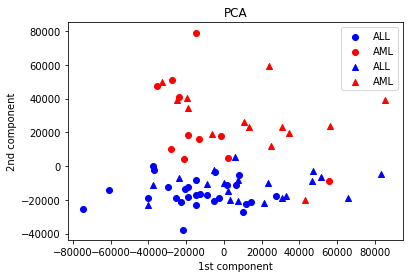

In [60]:
%matplotlib inline
plt.scatter(X_df_test.loc["ALL",0], X_df_test.loc["ALL",1], c="blue", label="ALL")
plt.scatter(X_df_test.loc["AML",0], X_df_test.loc["AML",1], c="red", label="AML")
plt.scatter(X_df_test.loc["ALL_test",0], X_df_test.loc["ALL_test",1], 
            c="blue", label="ALL", marker="^")
plt.scatter(X_df_test.loc["AML_test",0], X_df_test.loc["AML_test",1], 
            c="red", label="AML", marker="^") 

plt.legend()

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("PCA")

<IPython.core.display.Javascript object>


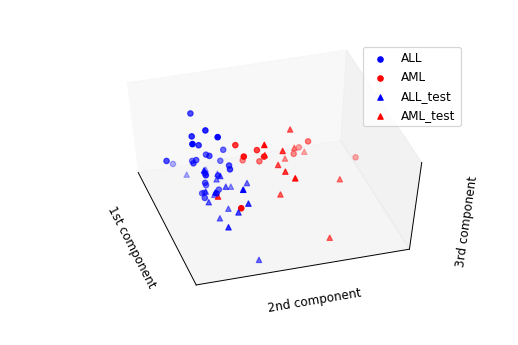

In [61]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig_3D = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(X_df_test.loc["ALL",0], X_df_test.loc["ALL",1], X_df_test.loc["ALL",2], c="blue", label="ALL")
ax.scatter(X_df_test.loc["AML",0], X_df_test.loc["AML",1], X_df_test.loc["AML",2], c="red", label="AML")
ax.scatter(X_df_test.loc["ALL_test",0], X_df_test.loc["ALL_test",1], X_df_test.loc["ALL_test",2], 
           c="blue", label="ALL_test", marker="^")
ax.scatter(X_df_test.loc["AML_test",0], X_df_test.loc["AML_test",1], X_df_test.loc["AML_test",2], 
           c="red", label="AML_test", marker="^")

ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")
ax.set_zlabel("3rd component")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


ax.legend()

Researches always use confirmatory techniques to get sure in the results obtained. 
I believe PCA could be helpful as a rough predictive model in this context.